# Diabetes Case Prediction
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly `$327` billion dollars and total costs with undiagnosed diabetes and prediabetes approaching `$400` billion dollars annually.

In [ ]:
import pandas as pd
import requests
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
orig_url="https://drive.google.com/file/d/1UlPmNQqOdVZnqsvXEFPqJccd0L434v6w/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
data['Diabetes'].replace(2,1, inplace=True)

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Missing Values

In [ ]:
data.isnull().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Result shows there are no missing values in the dataset.**

### Unique Values

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Unique Value Count']).transpose()

,Unique Value Count
Diabetes,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Age is categorical variable as each number is a range of years, such as -

Age == 1 = '18 to 24' years of age

Age == 2 = '25 to 29' years of age

Age == 3 = '30 to 34' years of age

Age == 4 = '35 to 39' years of age

Age == 5 = '40 to 44' years of age

Age == 6 = '45 to 49' years of age

Age == 7 = '50 to 54' years of age

Age == 8 = '55 to 59' years of age

Age == 9 = '60 to 64' years of age

Age == 10 = '65 to 69' years of age

Age == 11 = '70 to 74' years of age

Age == 12 = '75 to 79' years of age

Age == 13 = '80 or older' years of age


Similarly, GenHealth and Education is also categorical, with the follwoing explanation -

GenHlth == 5 = 'Excellent'

GenHlth == 4 = 'Very Good'

GenHlth == 3 = 'Good'

GenHlth == 2 = 'Fair'

GenHlth == 1 = 'Poor'


Education == 1 = 'Never Attended School'

Education == 2 = 'Elementary'

Education == 3 = 'Junior High School'

Education == 4 = 'Senior High School'

Education == 5 = 'Undergraduate Degree'

Education == 6 = 'Magister'

### Checking Duplicate Rows

In [ ]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  23968


,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


Result shows there are **23,899** duplicate rows. We will delete these rows.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(229712, 22)

### Descriptive Analysis

In [ ]:
cat_cols = ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
            'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Education', 'Income',  'Age']
num_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [ ]:
# Numerical Variables

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,229712.0,28.685711,6.787118,12.0,24.0,27.0,32.0,98.0
GenHlth,229712.0,2.601205,1.064778,1.0,2.0,3.0,3.0,5.0
MentHlth,229712.0,3.506425,7.714644,0.0,0.0,0.0,2.0,30.0
PhysHlth,229712.0,4.676425,9.047423,0.0,0.0,0.0,4.0,30.0


### Exploring all variables with Distribution

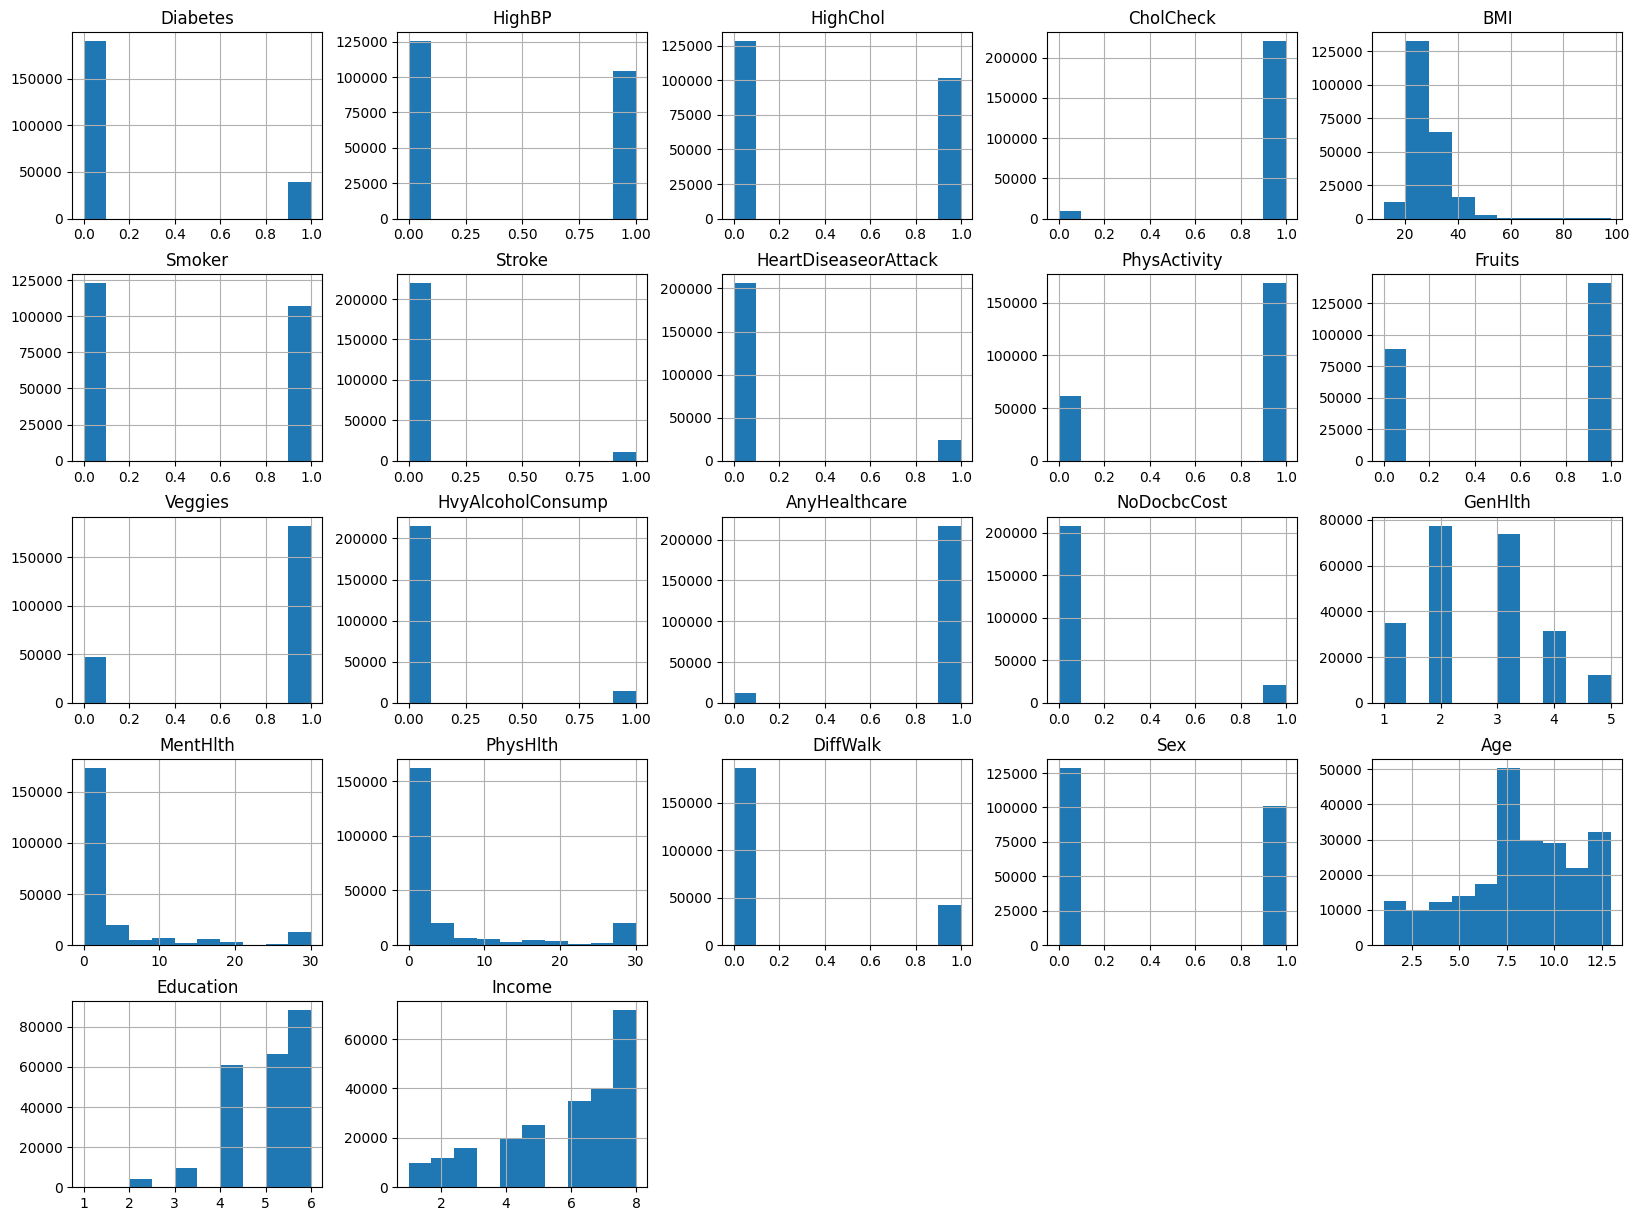

In [ ]:
data.hist(figsize=(20,15))
plt.show()

1. We can see here the value counts of all 22 columns.

2. Some of them columns are continuous column and some of them are discrete columns.

3. We can see here the Frequency of values in diffrent columns.

Observations -
1. **Body Mass Index (BMI)**: Most values fall below 40, and the distribution is right-skewed. This suggests that fewer people are in the higher BMI categories and that the majority of the dataset's participants have BMIs between normal and moderately overweight.

 The majority of the distribution lies in the range of 20 to 30, which conventional BMI categories classify as normal to slightly overweight. There is some variation in body weight among the sampled population, nevertheless, as seen by the presence of certain individuals in the dataset with BMIs significantly higher than 30, placing them in the obese category.

2. **GenHlth (General Health)**: This looks to be numerically encoded category data with values between 1 and 5. If we assume that 1 is "poor" and 5 is "excellent," the distribution has two modes at 2 and 3, indicating that most participants assessed their general health as either "fair" or "good."

 There is a notable amount of responses in categories 4 and 5, despite a notable concentration of responses in the 2 and 3 categories. This implies that even while the majority of people report fair to good general health, a significant percentage of the population nevertheless reports low to very poor health.

3. **MentHlth (Mental Health)**: The distribution is heavily right-skewed with a peak at 0, indicating that a large number of individuals reported no days of poor mental health. There are progressively fewer individuals reporting a higher number of poor mental health days.

 While a large proportion of individuals report zero days of mental health issues, the long tail to the right indicates that there's a subset of the population experiencing a significant number of days with mental health issues, possibly suggesting a smaller group within the population with chronic mental health problems.

4. **PhysHlth (Physical Health)**: Similar to Mental Health, this distribution is right-skewed with a peak at 0. This suggests that most individuals did not report days of poor physical health, with a smaller number reporting more days.

 There's a secondary, smaller peak between 1 and 5 days of physical health issues, which might indicate that a non-negligible number of individuals experience short-term physical health problems, perhaps common illnesses like flu or temporary conditions.

5. **Age**: The histogram shows a somewhat right-skewed distribution with multiple peaks, indicating that certain age groups are more prevalent in the dataset. It seems like there's a significant number of young adults (peaks possibly at ages 20 and 25) and then smaller groups of older adults.

 The distribution suggests a younger-skewed population but with a significant representation across a range of ages. There is less representation of individuals in the middle-age range, and a slight increase again in the older age categories, which may suggest participation from both younger and retirement-age adults.

6. **Education**: This data appears to be categorical, represented numerically, likely ranging from 1 (no high school) to 6 (advanced degree). There are peaks at levels 4 and 6, suggesting that the highest number of individuals in the dataset have completed an undergraduate degree or have advanced degrees.

 There's a noticeable gap between the higher education categories (4 and 6) and the lower ones (2 and 3), implying a polarization in educational attainment: a significant number of individuals have either completed only some high school/no college or have gone on to complete a full college education and beyond.

7. **Income**: This histogram shows that a large number of individuals fall into the higher income categories (likely 7 and 8, assuming these represent higher income brackets). The distribution is left-skewed, indicating fewer people in the lower income brackets.

 The smallest number of individuals appear to be in the mid-income categories, with the greatest numbers in the highest category. This might suggest that the dataset includes a higher proportion of well-off individuals, which could skew the results of any health-related analysis if income correlates with health outcomes.

### Univariate Analysis on Categorical Variables

In [ ]:
data['Diabetes'].replace(2,1, inplace=True)

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('-'*50)

Diabetes
0.0    0.827362
1.0    0.172638
Name: proportion, dtype: float64
--------------------------------------------------
HighBP
0.0    0.545622
1.0    0.454378
Name: proportion, dtype: float64
--------------------------------------------------
HighChol
0.0    0.558303
1.0    0.441697
Name: proportion, dtype: float64
--------------------------------------------------
CholCheck
1.0    0.959523
0.0    0.040477
Name: proportion, dtype: float64
--------------------------------------------------
Smoker
0.0    0.534313
1.0    0.465687
Name: proportion, dtype: float64
--------------------------------------------------
Stroke
0.0    0.955235
1.0    0.044765
Name: proportion, dtype: float64
--------------------------------------------------
HeartDiseaseorAttack
0.0    0.896784
1.0    0.103216
Name: proportion, dtype: float64
--------------------------------------------------
PhysActivity
1.0    0.733283
0.0    0.266717
Name: proportion, dtype: float64
----------------------------------------

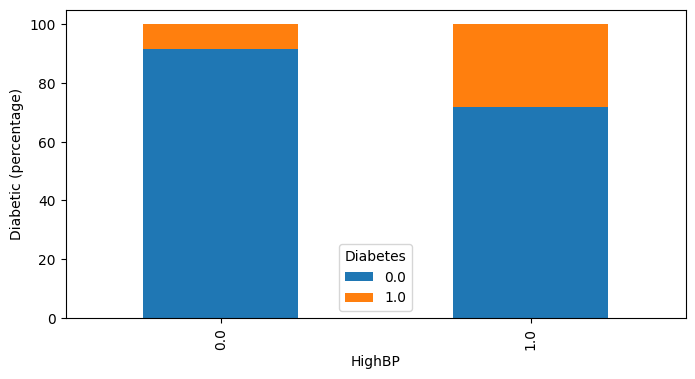

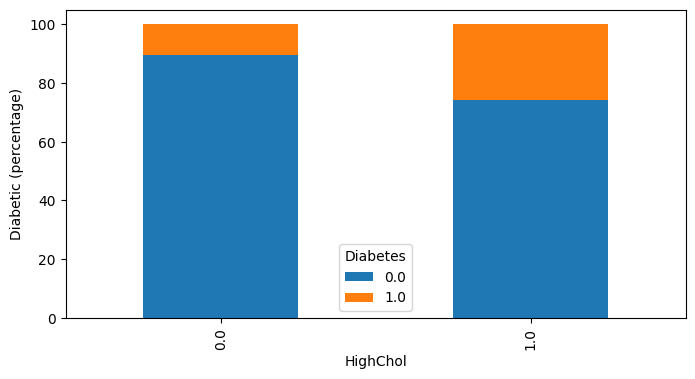

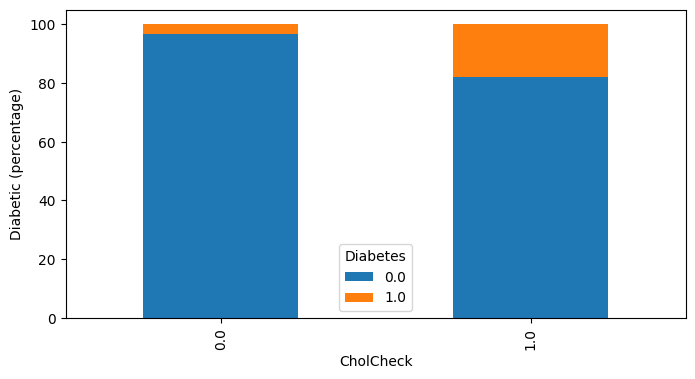

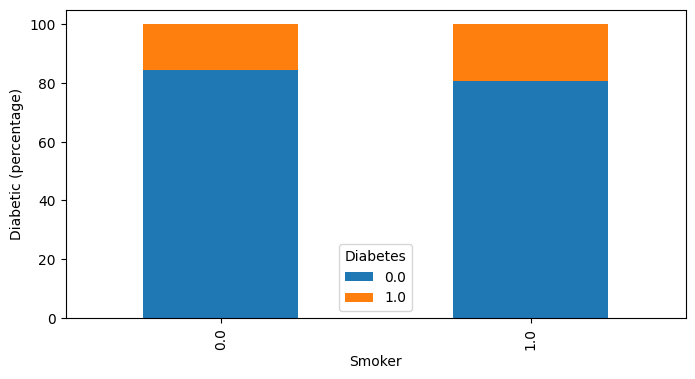

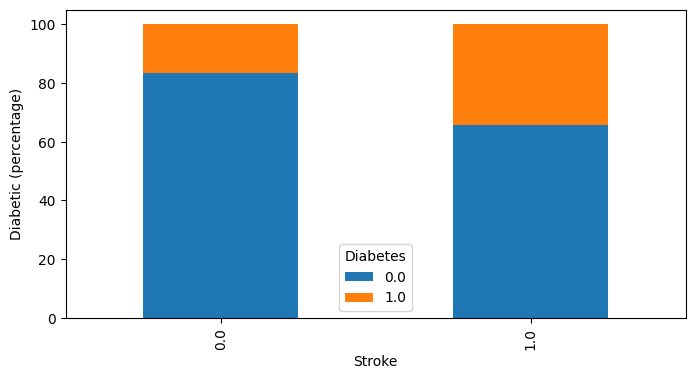

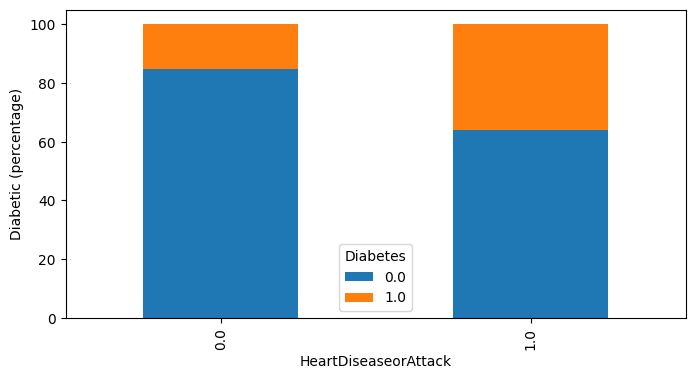

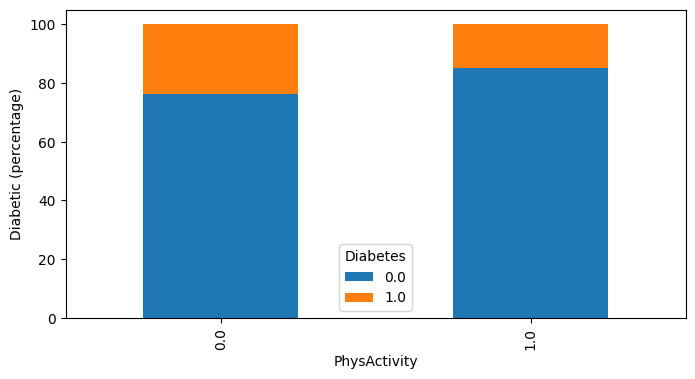

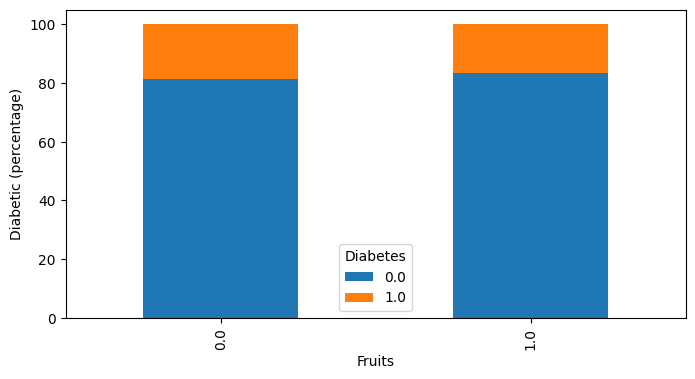

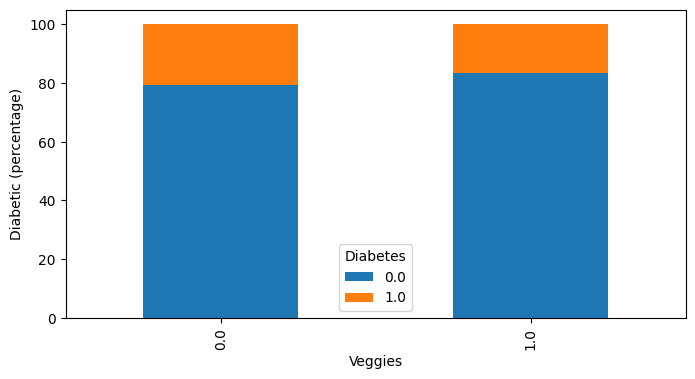

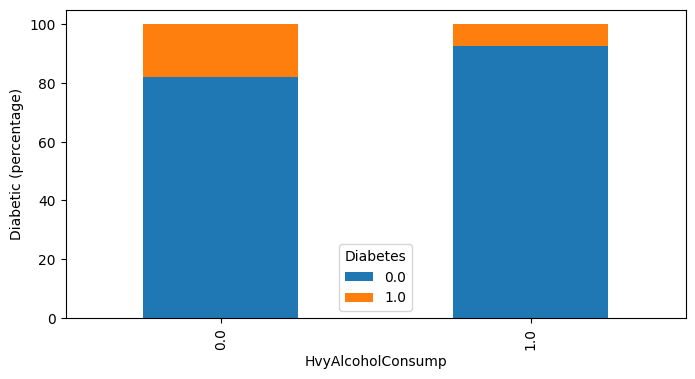

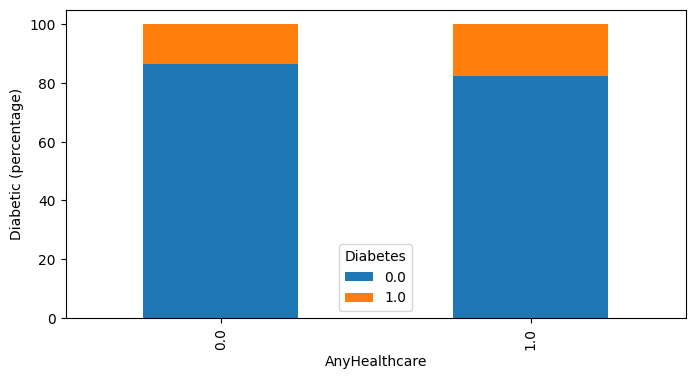

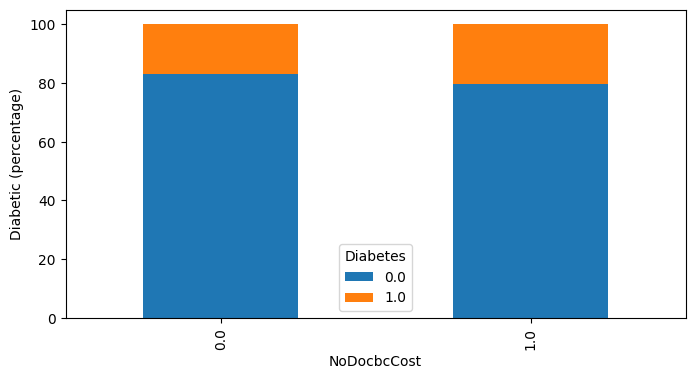

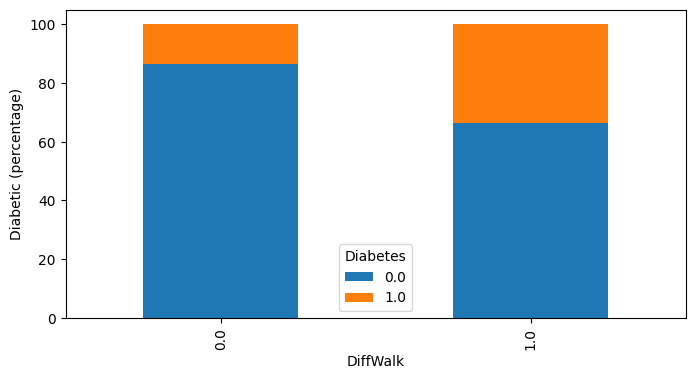

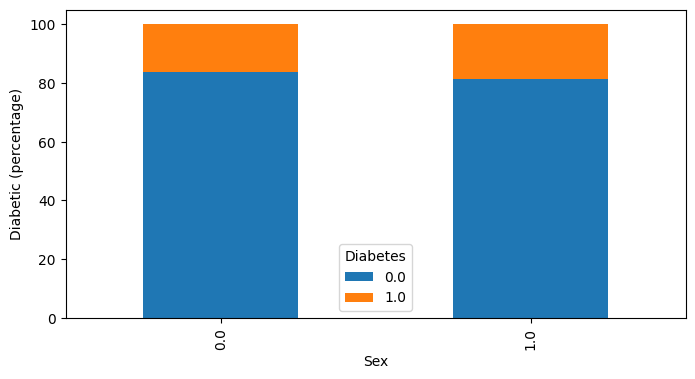

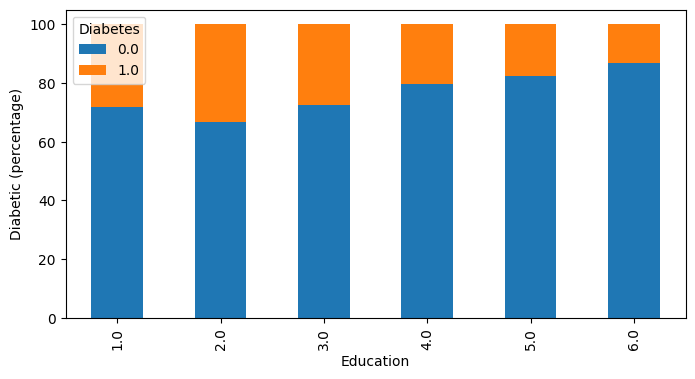

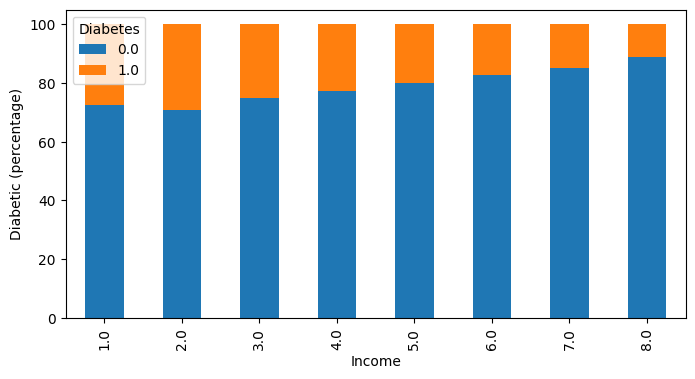

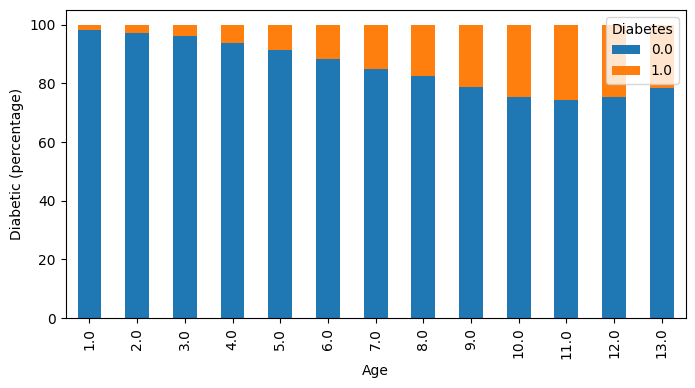

In [ ]:
for i in cat_cols:
    if i!='Diabetes':
        (pd.crosstab(data[i],data['Diabetes'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Diabetic (percentage)')

### Checking the relationship between Diabetic and numerical variables

In [ ]:
data.groupby(['Diabetes'])[num_cols].mean()

,BMI,GenHlth,MentHlth,PhysHlth
Diabetes,,,,
0.0,28.030528,2.463724,3.297914,4.018805
1.0,31.825655,3.260080,4.505711,7.828051


### Plotting the Correlation Matrix for all variables

Text(0.5, 1.0, 'Correlation of variables')

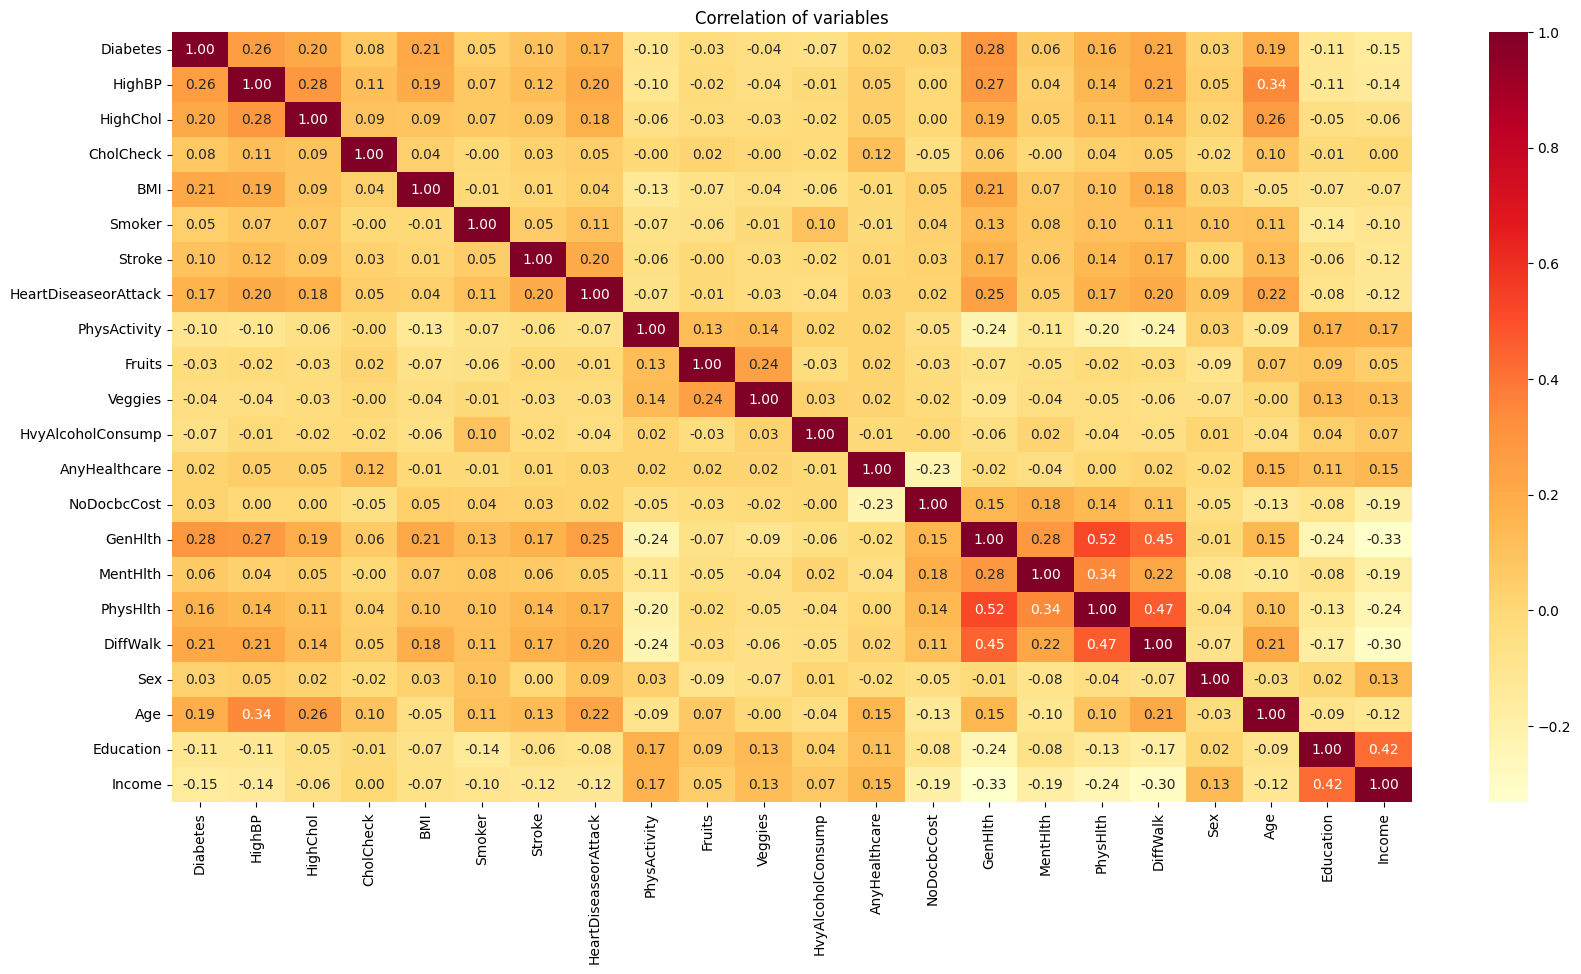

In [ ]:
# plotting the correation between numerical variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, fmt='0.2f', cmap='YlOrRd')
plt.title("Correlation of variables")

**Correlation Matrix shows relation between the following columns**

Positive Relation:
- PhysHlth and GenHlth
- PhysHlth and DiffWalk
- GenHlth and DiffWalk
- Income and Education

Negative Relation:
- Income and GenHlth
- Income and DiffWalk


<Axes: title={'center': 'Correlation with Diabetes'}>

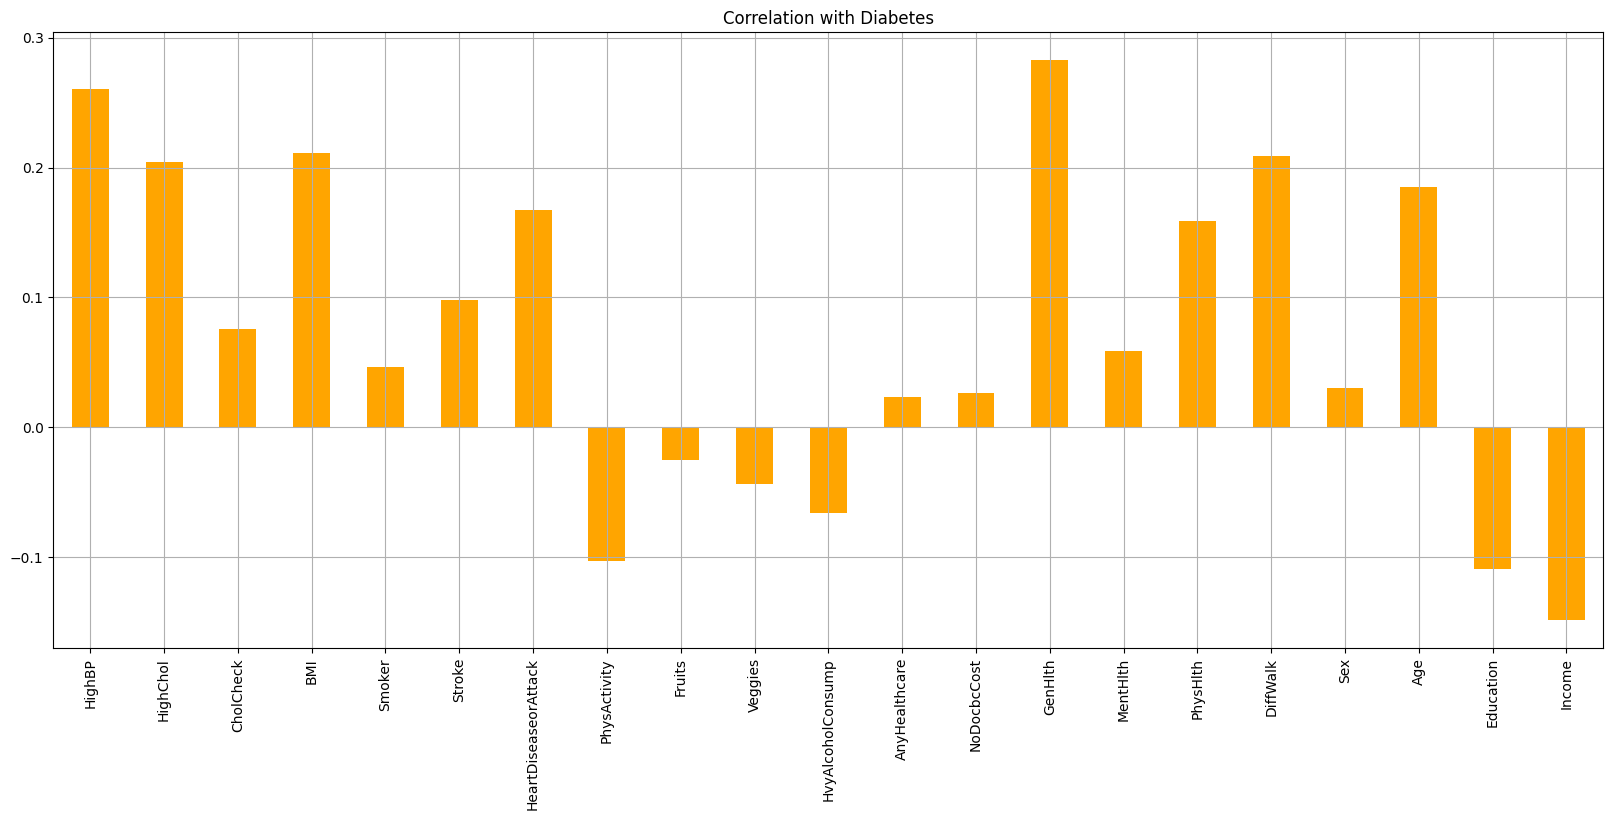

In [ ]:
data.drop('Diabetes', axis=1).corrwith(data.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8),
                                                     title="Correlation with Diabetes",color="Orange")

**Diabetes' relation with other columns Through bar Graph Result:**

1 . Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes.

2 . HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes.

# **Pre Processing**

GenHlth seems to have high corrrelations with multiple independant variables.

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('-'*50)

Diabetes
0.0    0.827362
1.0    0.172638
Name: proportion, dtype: float64
--------------------------------------------------
HighBP
0.0    0.545622
1.0    0.454378
Name: proportion, dtype: float64
--------------------------------------------------
HighChol
0.0    0.558303
1.0    0.441697
Name: proportion, dtype: float64
--------------------------------------------------
CholCheck
1.0    0.959523
0.0    0.040477
Name: proportion, dtype: float64
--------------------------------------------------
Smoker
0.0    0.534313
1.0    0.465687
Name: proportion, dtype: float64
--------------------------------------------------
Stroke
0.0    0.955235
1.0    0.044765
Name: proportion, dtype: float64
--------------------------------------------------
HeartDiseaseorAttack
0.0    0.896784
1.0    0.103216
Name: proportion, dtype: float64
--------------------------------------------------
PhysActivity
1.0    0.733283
0.0    0.266717
Name: proportion, dtype: float64
----------------------------------------

Removing all variables that have a split of 90-10 or worse:

In [ ]:
data_corr = data.drop(columns=['CholCheck', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'])
data_corr.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of variables')

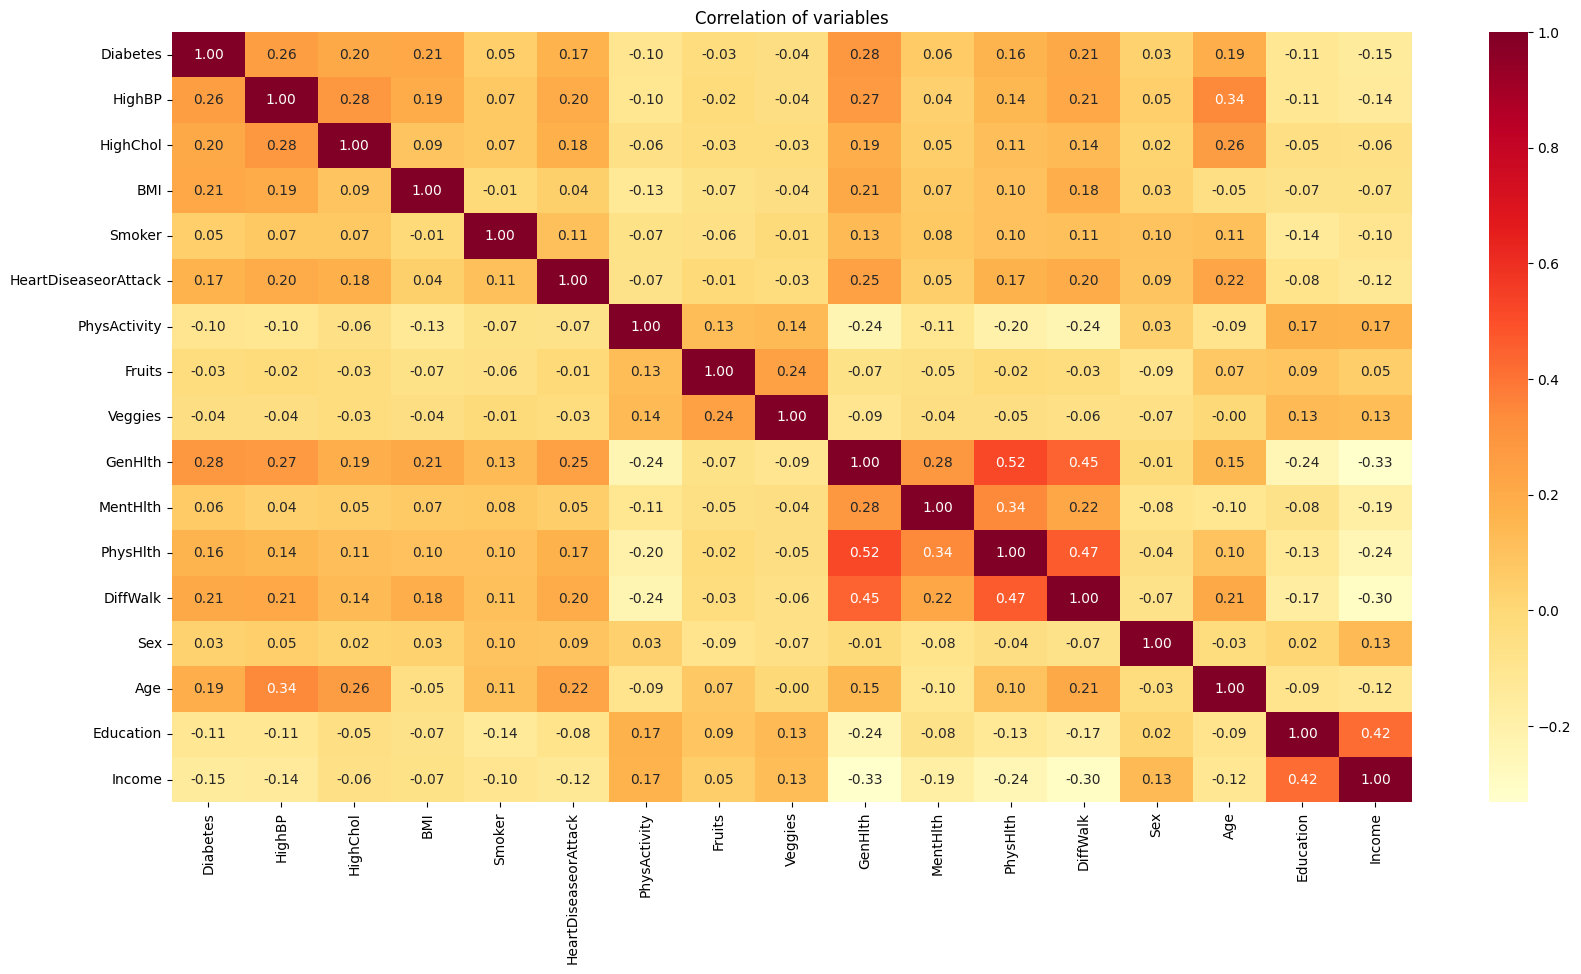

In [ ]:
# plotting the correation between numerical variables
plt.figure(figsize=(20,10))
sns.heatmap(data_corr.corr(),annot=True, fmt='0.2f', cmap='YlOrRd')
plt.title("Correlation of variables")

In [ ]:
data_corr = data_corr.drop(columns=['Income','DiffWalk','PhysHlth'])

<Axes: title={'center': 'Correlation with Diabetes'}>

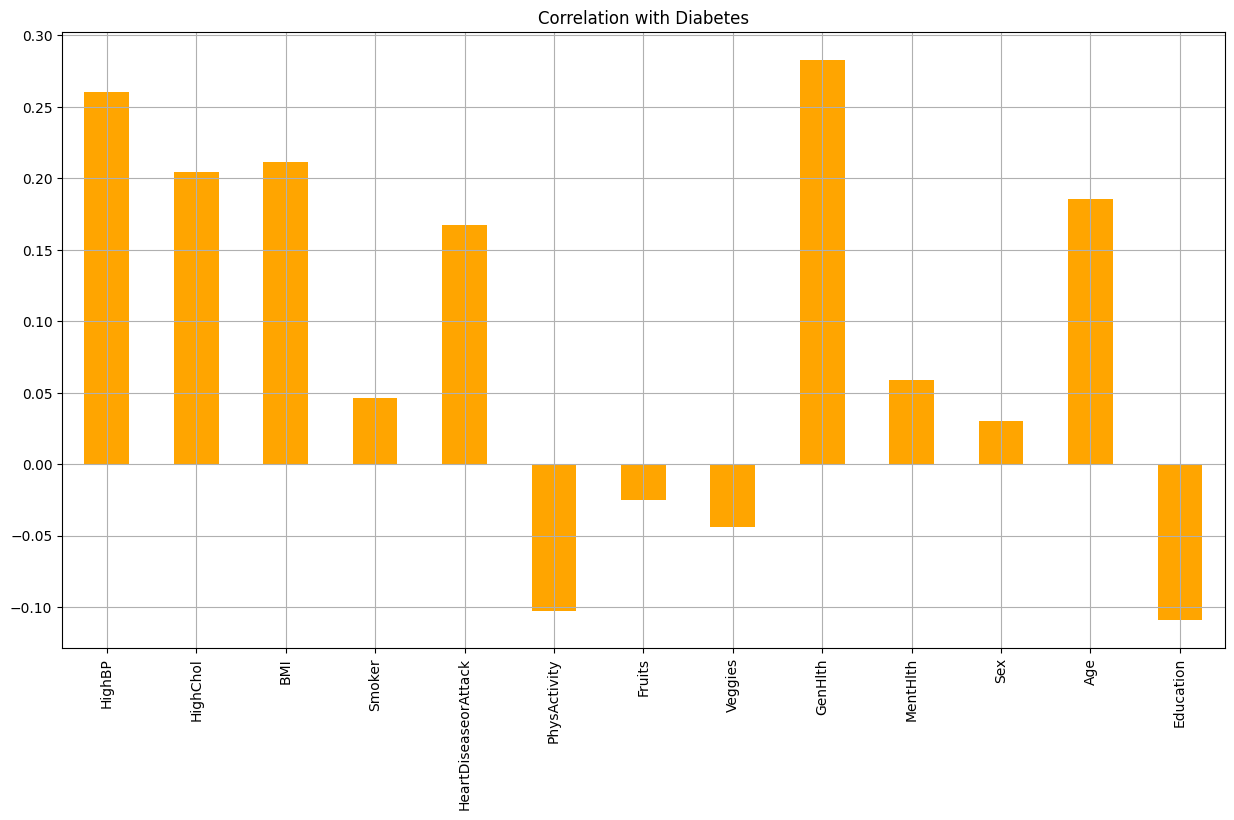

In [ ]:
data_corr.drop('Diabetes', axis=1).corrwith(data_corr.Diabetes).plot(kind='bar', grid=True, figsize=(15, 8),
                                                           title="Correlation with Diabetes",color="Orange")

Removing variables which are not defining the target variable (Any correlation value less than +-0.05 was dropped)

In [ ]:
data_corr = data_corr.drop(columns=['Fruits', 'Smoker', 'Veggies', 'Sex'])

<Axes: title={'center': 'Correlation with Diabetes'}>

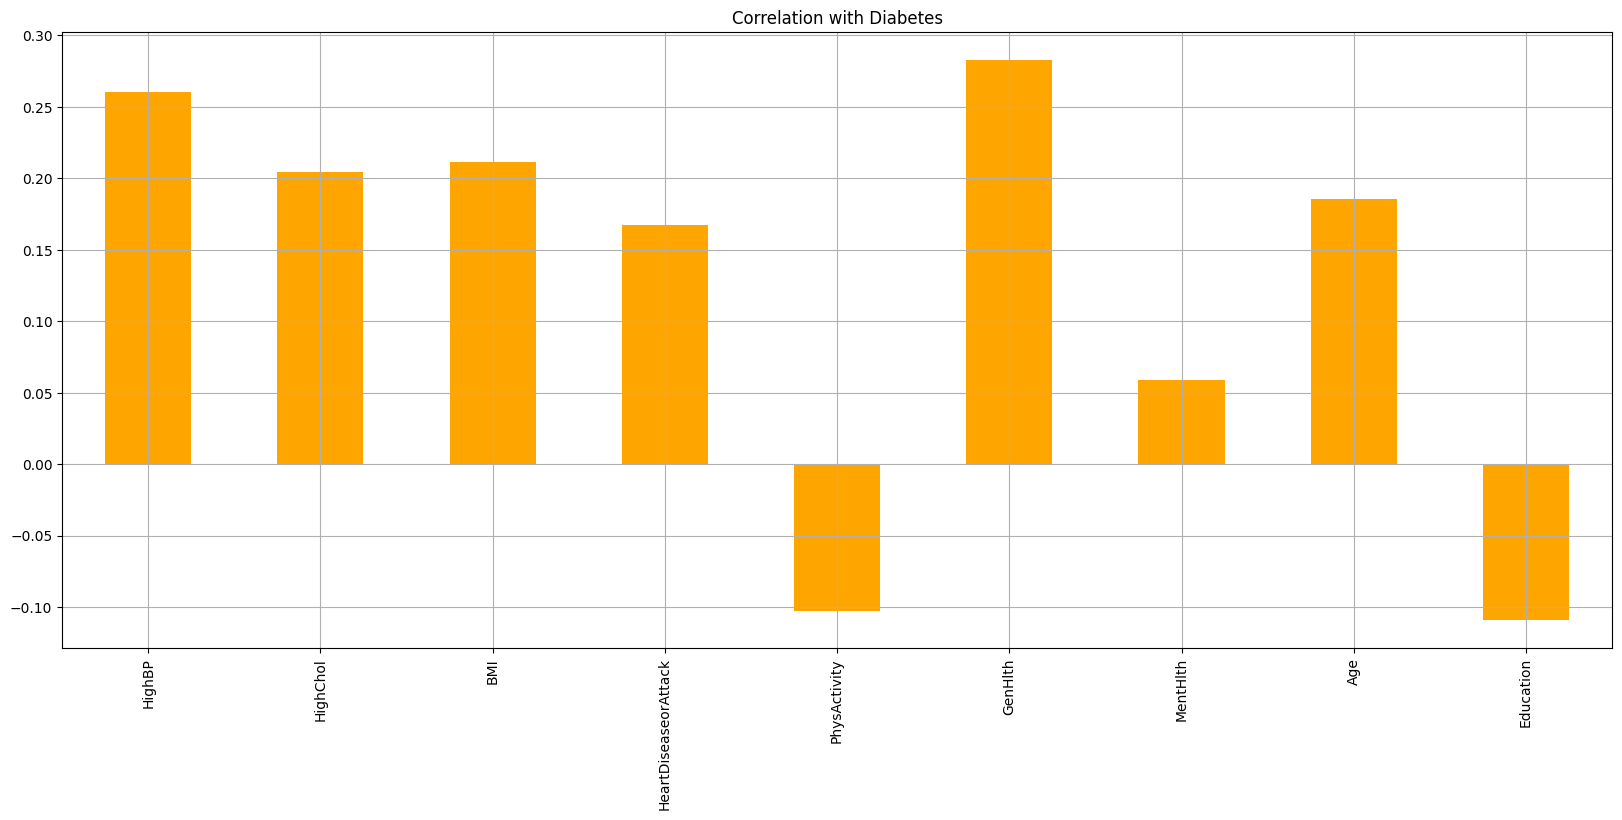

In [ ]:
data_corr.drop('Diabetes', axis=1).corrwith(data_corr.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8),
                                                           title="Correlation with Diabetes",color="Orange")

# Outlier Detection

### Creating Box Plots for numerical variable (BMI) to detect outliers

<Axes: ylabel='BMI'>

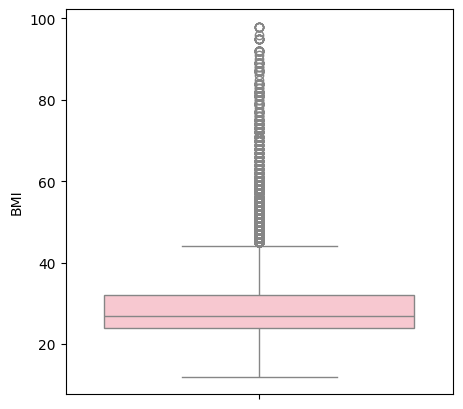

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_corr['BMI'], color = 'pink')

<Axes: ylabel='BMI'>

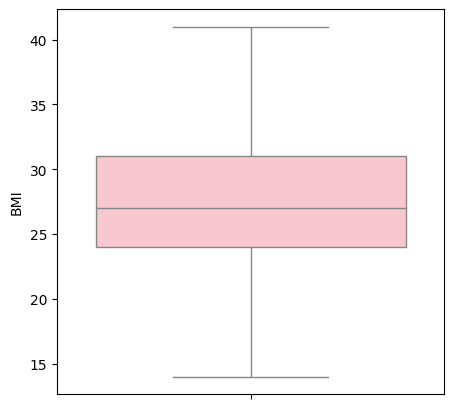

In [ ]:
threshold_high = 41
threshold_low = 14
data_corr = data_corr[data_corr['BMI'] <= threshold_high]
data_corr = data_corr[data_corr['BMI'] >= threshold_low]

plt.figure(figsize=(5,5))
sns.boxplot(data=data_corr['BMI'], color = 'pink')

# **Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split
x = data_corr.drop(columns='Diabetes')
y = data_corr['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 7)

# **The** **Models**

## Importing necessary libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

# for tuning the model
from sklearn.model_selection import GridSearchCV

# decisin tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# random forest
from sklearn.ensemble import RandomForestClassifier

# k neighbors classifier
from sklearn.neighbors import KNeighborsClassifier




## Defining Functions

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    tp = cm[0][0]
    fn = cm[0][1]
    fp = cm[1][0]
    tn = cm[1][1]

    prec = tp/(tp+fp)
    rec = tp/(tp+fn)

    print()
    print("Precision of the model:", prec)
    print("Recall of the model:", rec)
    # print("Accuracy of the model:", model.score)
    print()
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return prec, rec

def check_threshold(x_train, y_train, m):

  y_scores_model=m.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


  precisions_model, recalls_model, thresholds_model = precision_recall_curve(y_train, y_scores_model[:,1])

  #Plot values of precisions, recalls, and thresholds
  plt.figure(figsize=(10,7))
  plt.plot(thresholds_model, precisions_model[:-1], 'b--', label='precision')
  plt.plot(thresholds_model, recalls_model[:-1], 'g--', label = 'recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])
  plt.show()

In [ ]:
model_details = []

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy of the model: 0.8414497066410235

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91    128878
         1.0       0.54      0.15      0.24     25029

    accuracy                           0.84    153907
   macro avg       0.70      0.56      0.58    153907
weighted avg       0.81      0.84      0.80    153907


Precision of the model: 0.8558349908721833
Recall of the model: 0.9748754636167538



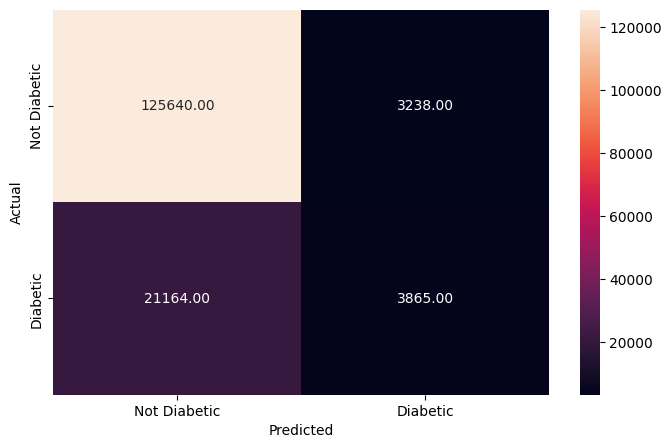

In [ ]:
# Checking performance on training data
y_pred_train = model.predict(x_train)
acc = model.score(x_train, y_train)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_train, y_pred_train)

In [ ]:
model_details.append(["Logistic Regression", "Train", prec, rec, acc])

In [ ]:
print(model_details)

[['Logistic Regression', 'Train', 0.8558349908721833, 0.9748754636167538, 0.8414497066410235]]


Accuracy of the model: 0.8393141401737391

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     54991
         1.0       0.56      0.16      0.25     10970

    accuracy                           0.84     65961
   macro avg       0.71      0.57      0.58     65961
weighted avg       0.80      0.84      0.80     65961


Precision of the model: 0.8529785948284088
Recall of the model: 0.9753777890927606



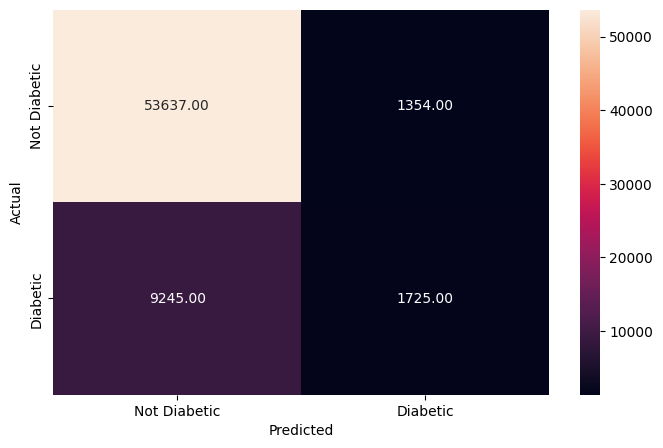

In [ ]:
y_pred_test = model.predict(x_test)
acc = model.score(x_test, y_test)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_test, y_pred_test)

In [ ]:
# model_details.append(["Logistic Regression", "Test", prec, rec, acc])

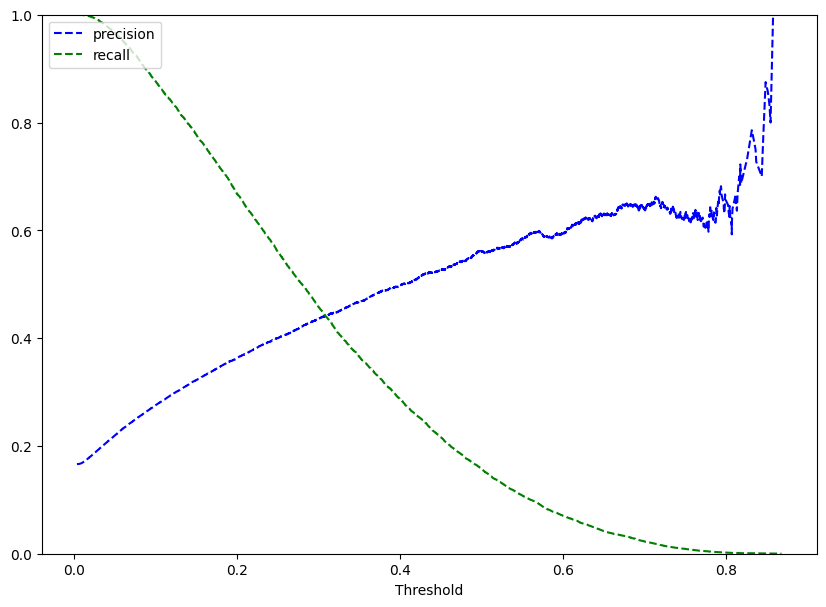

In [ ]:
check_threshold(x_test, y_test, model)

Accuracy of the model: 0.8393141401737391

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     54991
         1.0       0.46      0.38      0.42     10970

    accuracy                           0.82     65961
   macro avg       0.67      0.65      0.66     65961
weighted avg       0.81      0.82      0.82     65961


Precision of the model: 0.880764429754391
Recall of the model: 0.9110036187739812



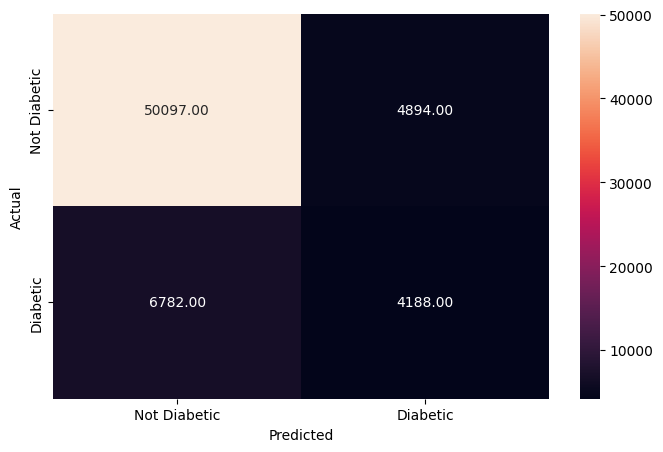

In [ ]:
optimal_threshold1=.34
y_pred_test = model.predict_proba(x_test)
acc = model.score(x_test, y_test)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

In [ ]:
model_details.append(["Logistic Regression", "Test", prec, rec, acc])

## Decision Tree

In [ ]:
data_tree = data_corr.copy()
dt = DecisionTreeClassifier(class_weight={0:0.35,1:0.65}, random_state=1)

In [ ]:
x_tree = data_tree.drop(columns='Diabetes')
y_tree = data_tree['Diabetes']
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.3, random_state = 7)

In [ ]:
dt.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, random_state=1)

In [ ]:
y_pred = dt.predict(x_test_tree)
y_pred[:6]

array([0., 1., 1., 0., 1., 0.])

Accuracy of the model: 0.9124796143125394

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    128878
         1.0       0.73      0.73      0.73     25029

    accuracy                           0.91    153907
   macro avg       0.84      0.84      0.84    153907
weighted avg       0.91      0.91      0.91    153907


Precision of the model: 0.9471237292338209
Recall of the model: 0.9484318502770062



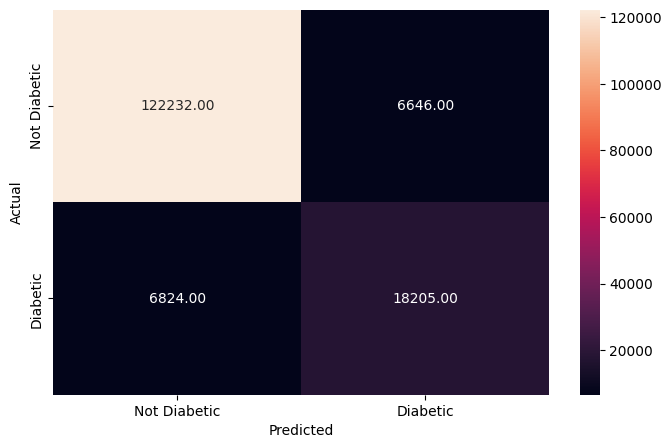

In [ ]:
y_train_pred_dt=dt.predict(x_train_tree)
acc = dt.score(x_train_tree, y_train_tree)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_train_tree,y_train_pred_dt)

In [ ]:
model_details.append(["Decision Tree", "Train", prec, rec, acc])

Accuracy of the model: 0.7828565364381983

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     54991
         1.0       0.35      0.34      0.34     10970

    accuracy                           0.78     65961
   macro avg       0.61      0.61      0.61     65961
weighted avg       0.78      0.78      0.78     65961


Precision of the model: 0.8688239135166509
Recall of the model: 0.8710516266298122



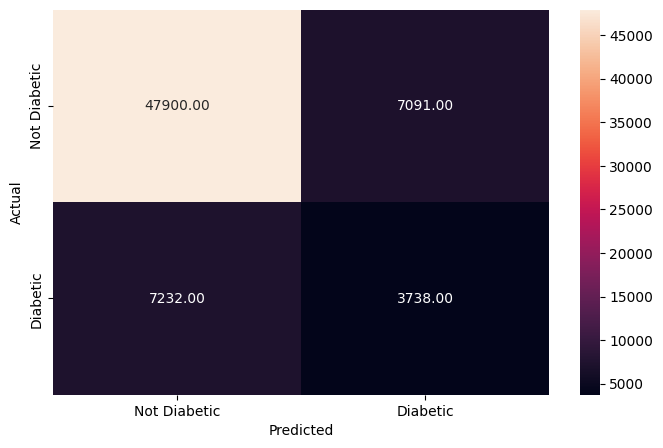

In [ ]:
y_pred_test_dt = dt.predict(x_test_tree)
acc = dt.score(x_test_tree, y_test_tree)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_test_tree, y_pred_test_dt)

In [ ]:
model_details.append(["Decision Tree", "Test", prec, rec, acc])

<Axes: ylabel='Importance'>

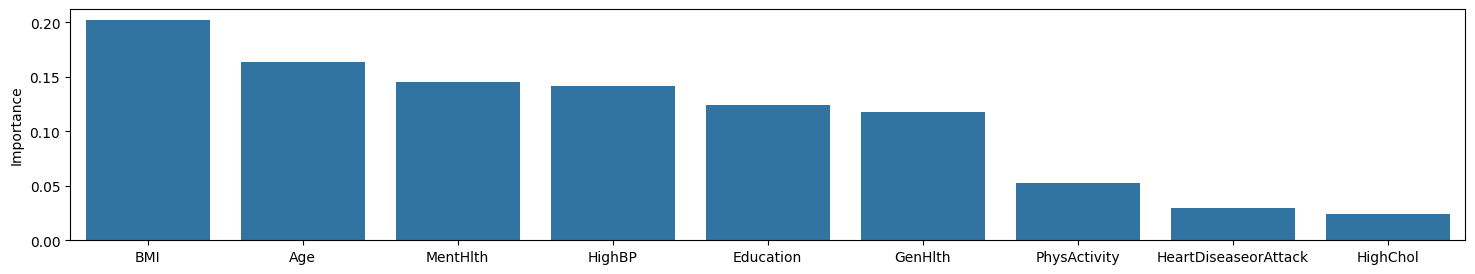

In [ ]:
importances = dt.feature_importances_
columns=x_tree.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(18,3))
sns.barplot(importance_df.Importance)

In [ ]:
data3 = data_corr.copy()

In [ ]:
data3 = data3.drop(columns=['HeartDiseaseorAttack', 'HighChol'])

In [ ]:
# from sklearn.model_selection import train_test_split
x_tree2 = data3.drop(columns='Diabetes')
y_tree2 = data3['Diabetes']
x_train_tree2, x_test_tree2, y_train_tree2, y_test_tree2 = train_test_split(x_tree2, y_tree2, test_size=0.4, random_state = 42)

In [ ]:
dt2 = DecisionTreeClassifier(class_weight={0:0.35,1:0.65}, random_state=42)

In [ ]:
dt2.fit(x_train_tree2, y_train_tree2)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, random_state=42)

In [ ]:
y_pred = dt2.predict(x_test_tree2)
y_pred[:6]

array([0., 0., 1., 0., 0., 0.])

Accuracy of the model: 0.8896528198908429

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93    110461
         1.0       0.67      0.64      0.65     21459

    accuracy                           0.89    131920
   macro avg       0.80      0.79      0.79    131920
weighted avg       0.89      0.89      0.89    131920


Precision of the model: 0.9312230215827338
Recall of the model: 0.9374530377237215



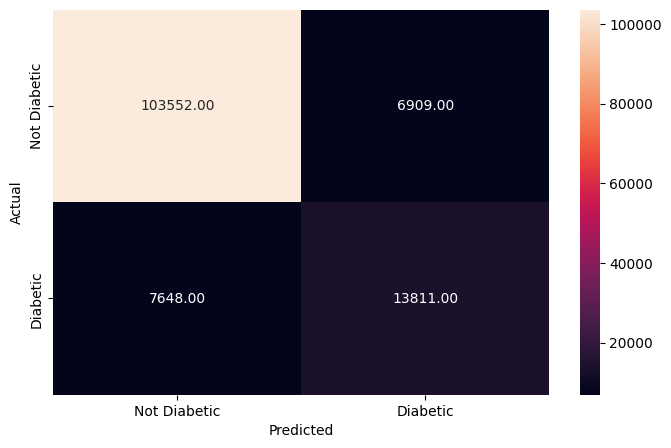

In [ ]:
y_train_pred_dt=dt2.predict(x_train_tree2)
acc = dt2.score(x_train_tree2, y_train_tree2)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_train_tree2,y_train_pred_dt)

In [ ]:
model_details.append(["Decision Tree 2", "Train", prec, rec, acc])

Accuracy of the model: 0.783485696093146

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     73408
         1.0       0.34      0.32      0.33     14540

    accuracy                           0.78     87948
   macro avg       0.60      0.60      0.60     87948
weighted avg       0.78      0.78      0.78     87948


Precision of the model: 0.8666244065602071
Recall of the model: 0.8753133173496077



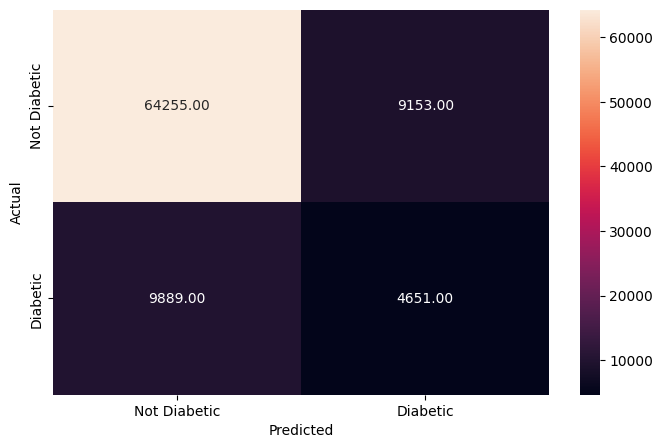

In [ ]:
y_test_pred_dt=dt2.predict(x_test_tree2)
acc = dt2.score(x_test_tree2, y_test_tree2)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_test_tree2,y_test_pred_dt)

In [ ]:
model_details.append(["Decision Tree 2", "Test", prec, rec, acc])

## Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(random_state=int(508312/4), class_weight= {0: 3, 1:5}, n_estimators=20)

In [ ]:
x_clf = data3.drop(columns='Diabetes')
y_clf = data3['Diabetes']
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.4, random_state = 42)

In [ ]:
clf.fit(x_clf, y_clf)

RandomForestClassifier(class_weight={0: 3, 1: 5}, n_estimators=20,
                       random_state=127078)

Accuracy of the model: 0.8802683444511825

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93    110461
         1.0       0.67      0.53      0.59     21459

    accuracy                           0.88    131920
   macro avg       0.79      0.74      0.76    131920
weighted avg       0.87      0.88      0.87    131920


Precision of the model: 0.9122221835156413
Recall of the model: 0.9482532296466626



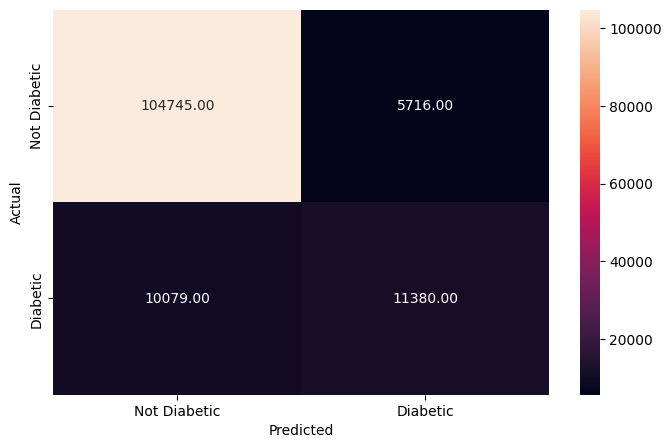

In [ ]:
y_train_pred_clf=clf.predict(x_train_clf)
acc = clf.score(x_train_clf, y_train_clf)
print("Accuracy of the model:", acc)
print()
prec, rec = metrics_score(y_train_clf,y_train_pred_clf)

In [ ]:
model_details.append(["Random Forest", "Train", prec, rec, acc])

Accuracy of the model: 0.8805430481648246

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     73408
         1.0       0.68      0.53      0.59     14540

    accuracy                           0.88     87948
   macro avg       0.79      0.74      0.76     87948
weighted avg       0.87      0.88      0.87     87948


Precision of the model: 0.9103089286646141
Recall of the model: 0.9505367262423714



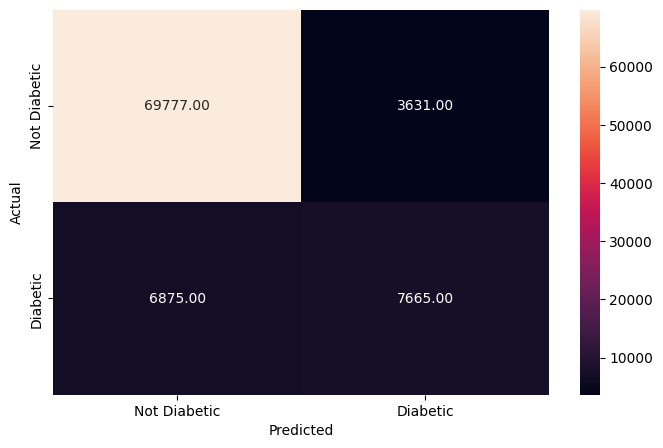

In [ ]:
y_pred_test = clf.predict(x_test_clf)
acc = clf.score(x_test_clf, y_test_clf)
print("Accuracy of the model:", acc)
print()

prec, rec = metrics_score(y_test_clf, y_pred_test)

In [ ]:
model_details.append(["Random Forest", "Test", prec, rec, acc])

## KNN

In [ ]:
neighbors = [3,5,7,9]

In [ ]:
data_knn = data.copy()
x_knn = data_knn.drop(columns='Diabetes')
y_knn = data_knn['Diabetes']
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, test_size=0.4, random_state = 42)

Accuracy of the model: 0.8821421056832116

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93    114031
         1.0       0.74      0.49      0.59     23796

    accuracy                           0.88    137827
   macro avg       0.82      0.73      0.76    137827
weighted avg       0.87      0.88      0.87    137827


Precision of the model: 0.9012827983552605
Recall of the model: 0.9630275977585042



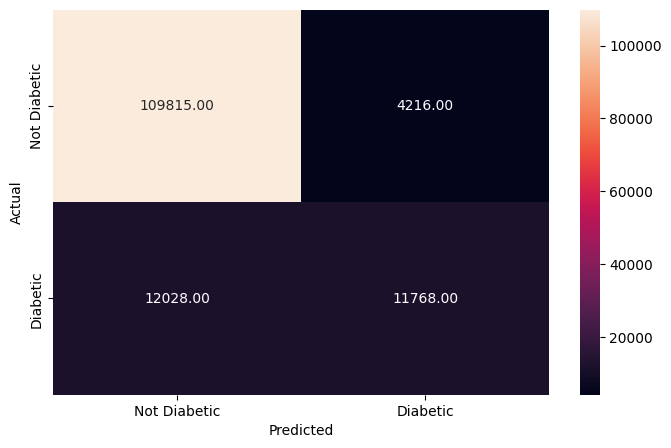

Accuracy of the model: 0.8820373292702836

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     76024
         1.0       0.74      0.49      0.59     15861

    accuracy                           0.88     91885
   macro avg       0.82      0.73      0.76     91885
weighted avg       0.87      0.88      0.87     91885


Precision of the model: 0.9011730241374641
Recall of the model: 0.9630379880037883



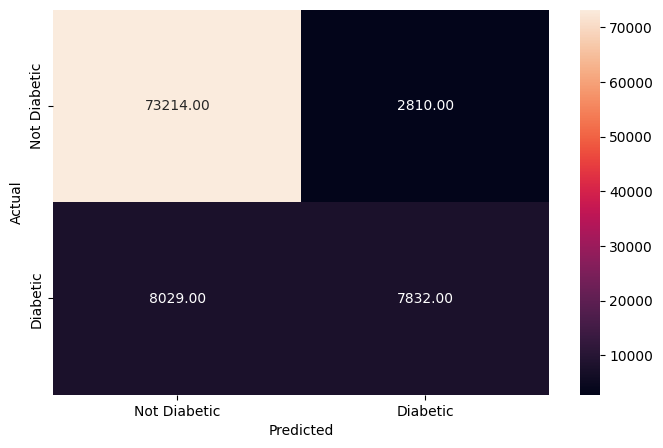

Accuracy of the model: 0.8618485492682856

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92    114031
         1.0       0.68      0.37      0.48     23796

    accuracy                           0.86    137827
   macro avg       0.78      0.67      0.70    137827
weighted avg       0.85      0.86      0.84    137827


Precision of the model: 0.8802398565344093
Recall of the model: 0.9642027168050793



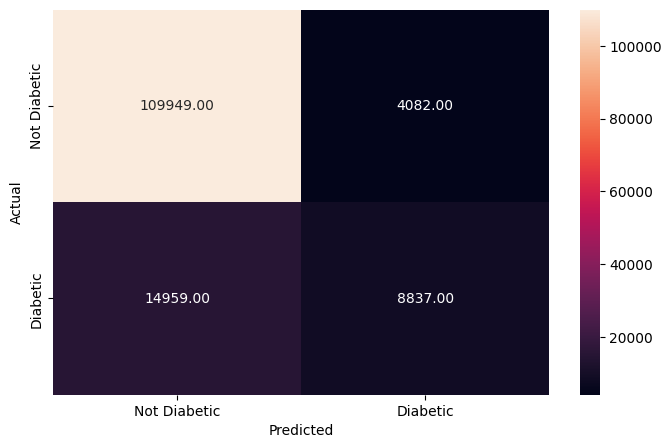

Accuracy of the model: 0.8612504761386516

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     76024
         1.0       0.68      0.37      0.48     15861

    accuracy                           0.86     91885
   macro avg       0.78      0.67      0.70     91885
weighted avg       0.85      0.86      0.84     91885


Precision of the model: 0.880007206774368
Recall of the model: 0.9637088287909081



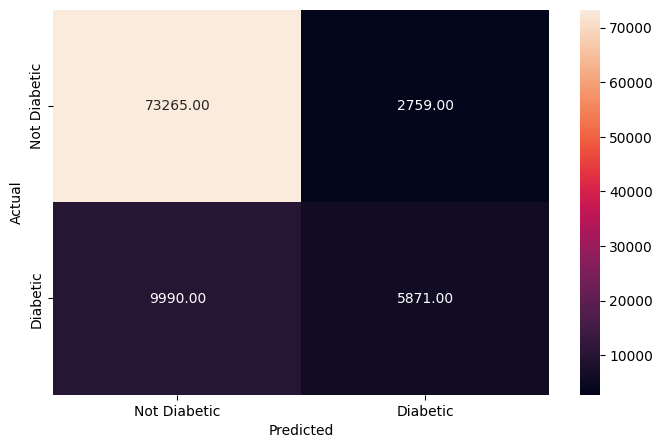

Accuracy of the model: 0.8526848875764546

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    114031
         1.0       0.66      0.31      0.42     23796

    accuracy                           0.85    137827
   macro avg       0.76      0.64      0.67    137827
weighted avg       0.83      0.85      0.83    137827


Precision of the model: 0.8701376657636383
Recall of the model: 0.9661320167322921



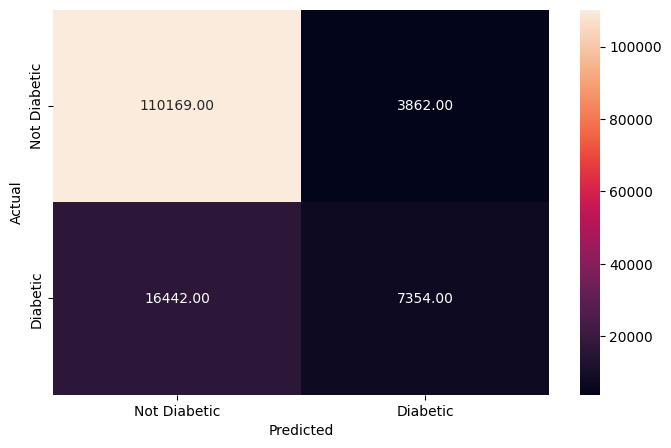

Accuracy of the model: 0.8536104913750884

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     76024
         1.0       0.66      0.31      0.42     15861

    accuracy                           0.85     91885
   macro avg       0.77      0.64      0.67     91885
weighted avg       0.83      0.85      0.83     91885


Precision of the model: 0.8702062453408432
Recall of the model: 0.9673524150268337



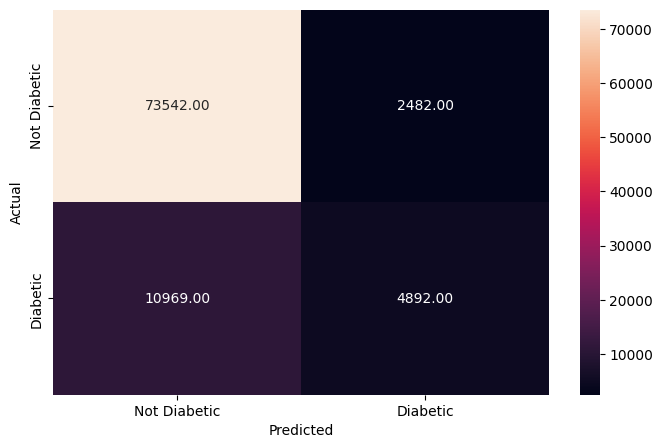

Accuracy of the model: 0.8495142461201362

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91    114031
         1.0       0.65      0.28      0.39     23796

    accuracy                           0.85    137827
   macro avg       0.76      0.62      0.65    137827
weighted avg       0.83      0.85      0.82    137827


Precision of the model: 0.8650129118084358
Recall of the model: 0.9693855179731827



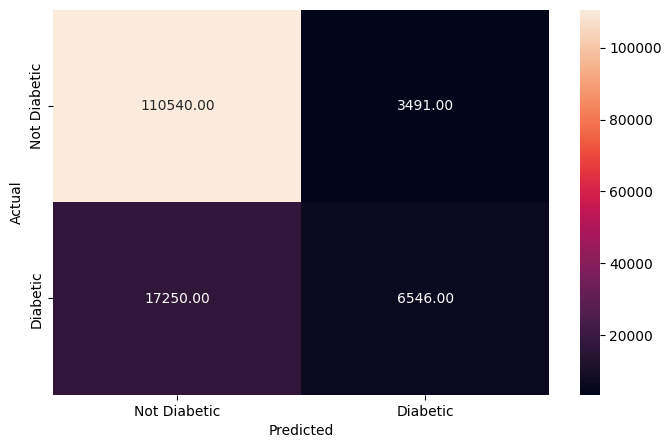

Accuracy of the model: 0.8495619524405507

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     76024
         1.0       0.65      0.27      0.38     15861

    accuracy                           0.85     91885
   macro avg       0.76      0.62      0.65     91885
weighted avg       0.83      0.85      0.82     91885


Precision of the model: 0.8646997431898402
Recall of the model: 0.9699437019888456



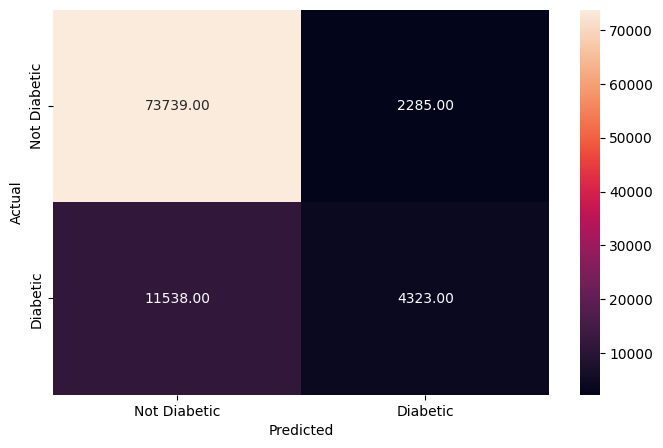

In [ ]:
knn_models = []
for neighbor in neighbors:

  neigh = KNeighborsClassifier(n_neighbors=neighbor)
  neigh.fit(x_knn, y_knn)

  knn_models.append(neigh)

  y_train_pred_knn=neigh.predict(x_train_knn)
  acc = neigh.score(x_train_knn, y_train_knn)
  print("Accuracy of the model:", acc)
  print()
  prec, rec = metrics_score(y_train_knn,y_train_pred_knn)

  model_details.append(["KNN (Neighbors = " + str(neighbor) + ")", "Train", prec, rec, acc])

  y_test_pred_knn=neigh.predict(x_test_knn)
  acc = neigh.score(x_test_knn, y_test_knn)
  print("Accuracy of the model:", acc)
  print()
  prec, rec = metrics_score(y_test_knn,y_test_pred_knn)

  model_details.append(["KNN (Neighbors = " + str(neighbor) + ")", "Test", prec, rec, acc])

# **Observations**

In [ ]:
for i in model_details:
  print(i)

['Logistic Regression', 'Train', 0.8558349908721833, 0.9748754636167538, 0.8414497066410235]
['Logistic Regression', 'Test', 0.880764429754391, 0.9110036187739812, 0.8393141401737391]
['Decision Tree', 'Train', 0.9471237292338209, 0.9484318502770062, 0.9124796143125394]
['Decision Tree', 'Test', 0.8688239135166509, 0.8710516266298122, 0.7828565364381983]
['Decision Tree 2', 'Train', 0.9312230215827338, 0.9374530377237215, 0.8896528198908429]
['Decision Tree 2', 'Test', 0.8666244065602071, 0.8753133173496077, 0.783485696093146]
['Random Forest', 'Train', 0.9122221835156413, 0.9482532296466626, 0.8802683444511825]
['Random Forest', 'Test', 0.9103089286646141, 0.9505367262423714, 0.8805430481648246]
['KNN (Neighbors = 3)', 'Train', 0.9012827983552605, 0.9630275977585042, 0.8821421056832116]
['KNN (Neighbors = 3)', 'Test', 0.9011730241374641, 0.9630379880037883, 0.8820373292702836]
['KNN (Neighbors = 5)', 'Train', 0.8802398565344093, 0.9642027168050793, 0.8618485492682856]
['KNN (Neighbors

In [ ]:
column_names = ["Model", "Test/Train", "Precision", "Recall", "Accuracy"]

In [ ]:
models = pd.DataFrame(model_details, columns=column_names, index=[i for i in range(1, len(model_details)+1)])
print(models)

                  Model Test/Train  Precision    Recall  Accuracy
1   Logistic Regression      Train   0.855835  0.974875  0.841450
2   Logistic Regression       Test   0.880764  0.911004  0.839314
3         Decision Tree      Train   0.947124  0.948432  0.912480
4         Decision Tree       Test   0.868824  0.871052  0.782857
5       Decision Tree 2      Train   0.931223  0.937453  0.889653
6       Decision Tree 2       Test   0.866624  0.875313  0.783486
7         Random Forest      Train   0.912222  0.948253  0.880268
8         Random Forest       Test   0.910309  0.950537  0.880543
9   KNN (Neighbors = 3)      Train   0.901283  0.963028  0.882142
10  KNN (Neighbors = 3)       Test   0.901173  0.963038  0.882037
11  KNN (Neighbors = 5)      Train   0.880240  0.964203  0.861849
12  KNN (Neighbors = 5)       Test   0.880007  0.963709  0.861250
13  KNN (Neighbors = 7)      Train   0.870138  0.966132  0.852685
14  KNN (Neighbors = 7)       Test   0.870206  0.967352  0.853610
15  KNN (N

In [ ]:
train_models = models[models["Test/Train"] == "Train"]
print(train_models)

                  Model Test/Train  Precision    Recall  Accuracy
1   Logistic Regression      Train   0.855835  0.974875  0.841450
3         Decision Tree      Train   0.947124  0.948432  0.912480
5       Decision Tree 2      Train   0.931223  0.937453  0.889653
7         Random Forest      Train   0.912222  0.948253  0.880268
9   KNN (Neighbors = 3)      Train   0.901283  0.963028  0.882142
11  KNN (Neighbors = 5)      Train   0.880240  0.964203  0.861849
13  KNN (Neighbors = 7)      Train   0.870138  0.966132  0.852685
15  KNN (Neighbors = 9)      Train   0.865013  0.969386  0.849514


In [ ]:
test_models = models[models["Test/Train"] == "Test"]
print(test_models)

                  Model Test/Train  Precision    Recall  Accuracy
2   Logistic Regression       Test   0.880764  0.911004  0.839314
4         Decision Tree       Test   0.868824  0.871052  0.782857
6       Decision Tree 2       Test   0.866624  0.875313  0.783486
8         Random Forest       Test   0.910309  0.950537  0.880543
10  KNN (Neighbors = 3)       Test   0.901173  0.963038  0.882037
12  KNN (Neighbors = 5)       Test   0.880007  0.963709  0.861250
14  KNN (Neighbors = 7)       Test   0.870206  0.967352  0.853610
16  KNN (Neighbors = 9)       Test   0.864700  0.969944  0.849562


In [ ]:
view = []
columns2 = ["Model", "Precision (Train)", "Precision (Test)" "Recall (Train)","Recall (Test)", "Accuracy (Train)", "Accuracy (Test)"]

for i in range(len(test_models)):
  temp = [train_model[i][0], train_model[i]]

### As seen by the tables, Random Forest and KNN (with 3 neighbors) perform the best on the dataset.